In [1]:
# import the necessary packages
import numpy as np
import time
import cv2
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt 


def show(image=None,string='',size=10):
  width,hight=image.shape[:2]
  asp=width/hight
  plt.figure(figsize=(asp*size,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(string)
  plt.show()

In [2]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/NeuralStyleTransfer.zip
!unzip -qq NeuralStyleTransfer.zip

--2023-04-27 18:04:54--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/NeuralStyleTransfer.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.82
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186982232 (178M) [application/zip]
Saving to: ‘NeuralStyleTransfer.zip’

NeuralStyleTransfer 100%[===================>] 178.32M  22.3MB/s    in 8.9s    

2023-04-27 18:05:04 (20.0 MB/s) - ‘NeuralStyleTransfer.zip’ saved [186982232/186982232]



In [6]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/city.jpg

--2023-04-27 18:26:21--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/city.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/city.jpg [following]
--2023-04-27 18:26:21--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/city.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 392132 (383K) [image/jpeg]
Saving to: ‘city.jpg’

city.jpg            100%[===================>] 382.94K  --.-KB/s    in 0.02s   

2023-04-27 18:26:22 (19.6 MB/s) - ‘city.jpg’ saved [392132/392132]



the image using starry_nightjpg


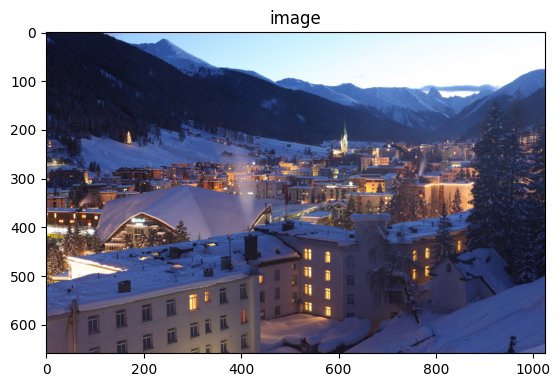

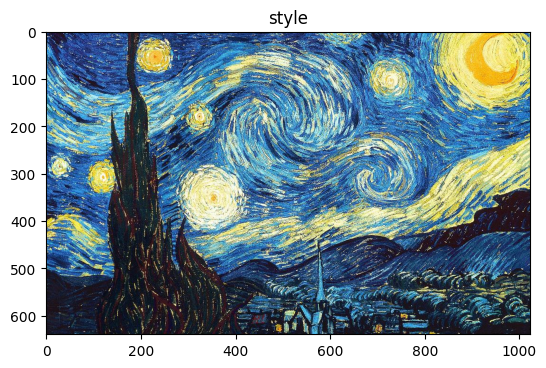

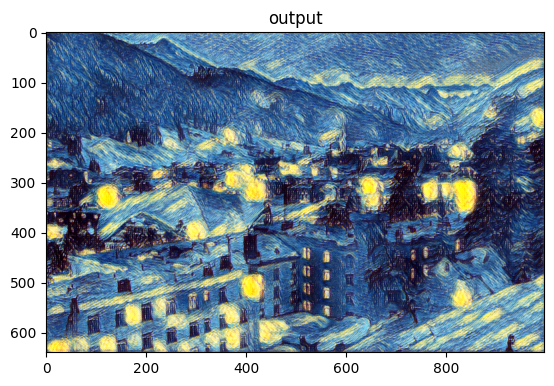

the image using composition_viijpg


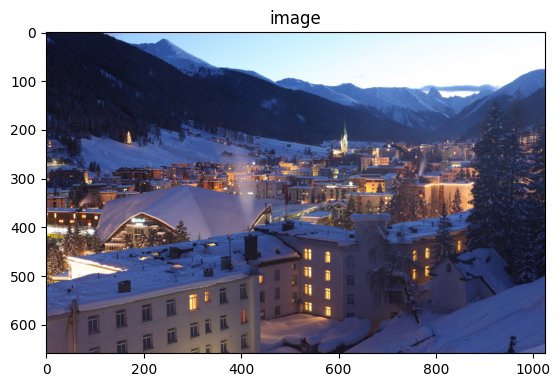

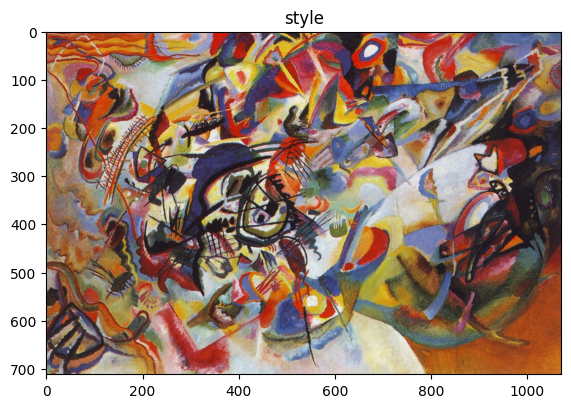

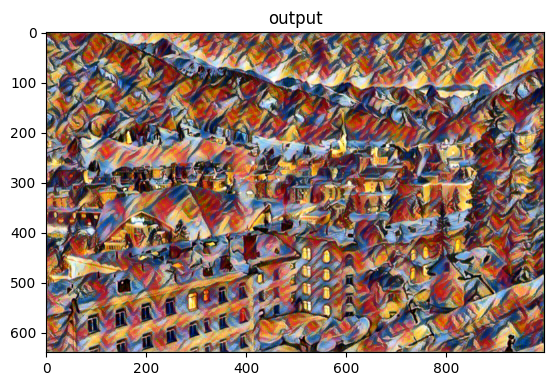

the image using la_musejpg


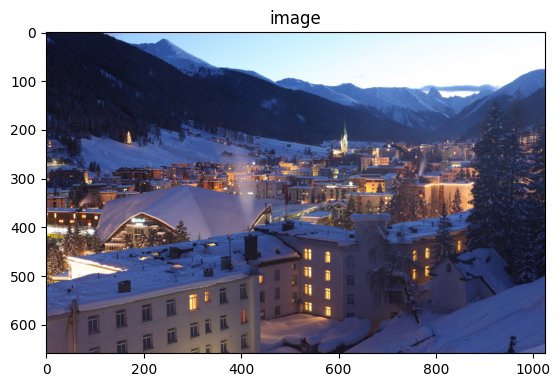

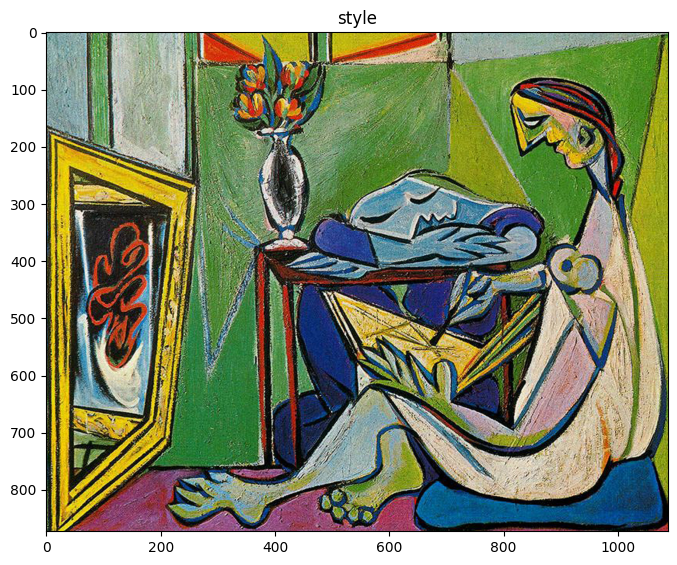

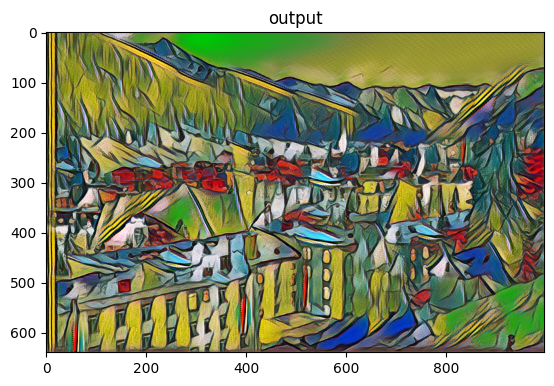

the image using the_wavejpg


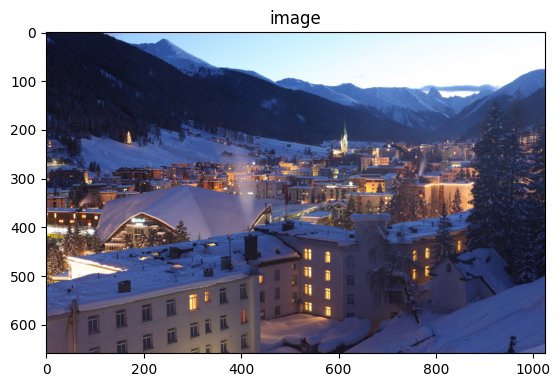

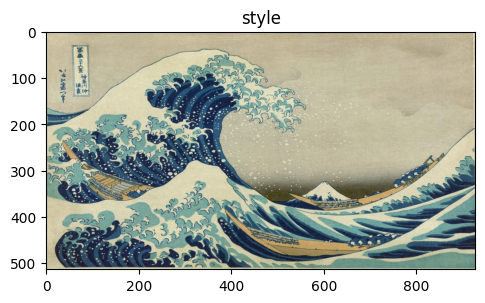

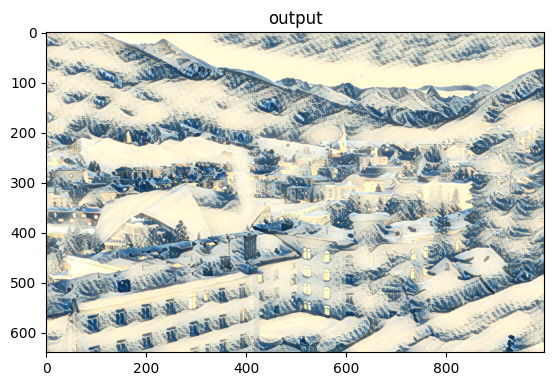

In [8]:
model_path='/content/NeuralStyleTransfer/models/ECCV16/'
model_file_paths = [f for f in listdir(model_path) if isfile(join(model_path, f))]
image=cv2.imread("city.jpg")


for i,model in enumerate(model_file_paths):
  print("the image using "+str(model)[:-3]+"jpg")
  style=cv2.imread("NeuralStyleTransfer/art/"+str(model)[:-3]+".jpg")
  nural_style_model=cv2.dnn.readNetFromTorch(model_path+ model)
  hight,width=image.shape[0],image.shape[1]
  new_width=int((640/hight)*width)
  resized=cv2.resize(image,(640,new_width))
  resizedImg = cv2.resize(image, (new_width, 640), interpolation = cv2.INTER_AREA)
  inpBlob = cv2.dnn.blobFromImage(resizedImg, 1.0, (new_width, 640), (103.939, 116.779, 123.68), swapRB=False, crop=False)
  nural_style_model.setInput(inpBlob)
  output=nural_style_model.forward()


  output = output.reshape(3, output.shape[2], output.shape[3])
  output[0] += 103.939
  output[1] += 116.779
  output[2] += 123.68
  output /= 255
  output = output.transpose(1, 2, 0)
  show(image,"image")
  show(style,"style")
  show(output,"output")